In [22]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [23]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [4]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Cpx-Liq')

myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=(~newMask)&(cpx_Glass['P_kbar_x']<17)
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<17
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)


C:\Users\penny\AppData\Local\Temp\ipykernel_31784\794807518.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


In [5]:
rand_choice=cpx_Glass.loc[Press_new&(Cpx_Glass['H2O_Liq']>0)].index.values
choose=np.random.choice(rand_choice, 50)
np.sort(choose)

array([406, 419, 428, 429, 452, 459, 466, 468, 469, 502, 522, 542, 544,
       551, 585, 590, 593, 616, 625, 639, 640, 650, 662, 671, 682, 683,
       700, 705, 711, 713, 716, 746, 746, 771, 776, 785, 794, 803, 807,
       821, 837, 849, 851, 853, 858, 863, 888, 889, 891, 893], dtype=int64)

In [6]:
# Filt2=[392, 398, 434, 450, 457, 468, 486, 488, 489, 502, 520, 526, 548, 561,
#        564, 572, 599, 601, 603, 606, 611, 636, 637, 642, 645, 646,
#        648, 649, 660, 673, 679, 689, 696, 730, 735, 739, 755, 793, 795,
#        799, 805, 806, 819, 825, 826, 831, 844, 879, 885,  888]

In [7]:
Filt=[392, 398, 434, 450, 457, 468, 486, 488, 489, 502, 520, 526, 548, 561,
       564, 572, 599, 603,  611, 636, 637,  645, 
        660, 673, 679, 689, 696, 730, 739, 755, 793, 795,
       799, 805, 806,  825, 826, 831, 844, 879,  888]

In [8]:
len(Filt)

41

(0.0, 10.0)

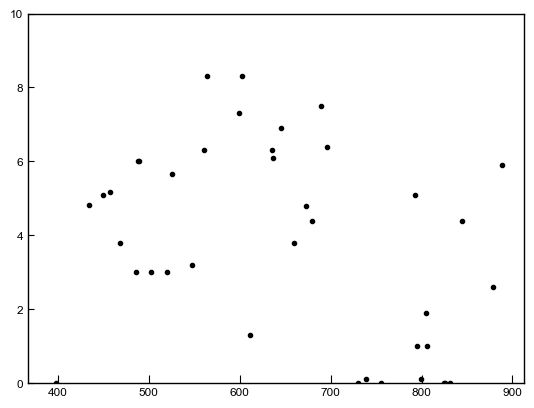

In [9]:
plt.plot(Filt, Cpx_Glass['H2O_Liq'].loc[Filt], '.k')
plt.ylim([0, 10])

In [10]:
myLiquids_Filt=myLiquids1.loc[Filt].reset_index(drop=True)
myCpxs_Filt=myCpxs1.loc[Filt].reset_index(drop=True)
Cpx_Glass_Filt=Cpx_Glass.loc[Filt].reset_index(drop=True)

In [11]:
delta_H_lin=np.linspace(-3, 3, 30)
HSens_Petrelli2020=np.empty([len(delta_H_lin), 
                    len(myLiquids_Filt)], dtype=float)



for i in range(0, len(delta_H_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
        HSens_Petrelli2020[i]=pt.calculate_cpx_liq_press(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq']+delta_H_lin[i],
                    equationP='P_Petrelli2020_Cpx_Liq').P_kbar_calc
    
Exp_HSens_Petrelli2020=pt.calculate_cpx_liq_press(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq'],
                    equationP='P_Petrelli2020_Cpx_Liq').P_kbar_calc

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [12]:
HSens_eq30=np.empty([len(delta_H_lin), 
                    len(myLiquids_Filt)], dtype=float)
HSens_eq31=np.empty([len(delta_H_lin), 
                    len(myLiquids_Filt)], dtype=float)
HSens_eq32c=np.empty([len(delta_H_lin), 
                    len(myLiquids_Filt)], dtype=float)

HSens_eq33_eq30=np.empty([len(delta_H_lin), 
                    len(myLiquids_Filt)], dtype=float)

HSens_eq33_eq31=np.empty([len(delta_H_lin), 
                    len(myLiquids_Filt)], dtype=float)


HSens_eq33_eq32c=np.empty([len(delta_H_lin), 
                    len(myLiquids_Filt)], dtype=float)

HSens_eq33_NP17=np.empty([len(delta_H_lin), 
                    len(myLiquids_Filt)], dtype=float)

for i in range(0, len(delta_H_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
        
        HSens_eq30[i]=pt.calculate_cpx_liq_press(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq']+delta_H_lin[i],
                    equationP='P_Put2008_eq30',
                                         T=Cpx_Glass_Filt['T_K_x'])
        HSens_eq31[i]=pt.calculate_cpx_liq_press(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq']+delta_H_lin[i],
                    equationP='P_Put2008_eq31',
                                         T=Cpx_Glass_Filt['T_K_x'])
        HSens_eq32c[i]=pt.calculate_cpx_liq_press(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq']+delta_H_lin[i],
                    equationP='P_Put2008_eq32c',
                                         T=Cpx_Glass_Filt['T_K_x'])
        HSens_eq33_eq30[i]=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq']+delta_H_lin[i],
                    equationT='T_Put2008_eq33',
                    equationP='P_Put2008_eq30').P_kbar_calc

        HSens_eq33_eq31[i]=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq']+delta_H_lin[i],
                    equationT='T_Put2008_eq33',
                    equationP='P_Put2008_eq31').P_kbar_calc
        
        
        HSens_eq33_eq32c[i]=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq']+delta_H_lin[i],
                    equationT='T_Put2008_eq33',
                    equationP='P_Put2008_eq32c').P_kbar_calc        
        
        HSens_eq33_NP17[i]=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq']+delta_H_lin[i],
                    equationT='T_Put2008_eq33',
                    equationP='P_Neave2017').P_kbar_calc    
        
Exp_HSens_eq30=pt.calculate_cpx_liq_press(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq'],
                    equationP='P_Put2008_eq30',
                                         T=Cpx_Glass_Filt['T_K_x'])


Exp_HSens_eq31=pt.calculate_cpx_liq_press(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq'],
                    equationP='P_Put2008_eq31',
                                         T=Cpx_Glass_Filt['T_K_x'])


Exp_HSens_eq32c=pt.calculate_cpx_liq_press(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq'],
                    equationP='P_Put2008_eq32c',
                                         T=Cpx_Glass_Filt['T_K_x'])

Exp_HSens_eq33_eq30=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq'],
                    equationT='T_Put2008_eq33',
                    equationP='P_Put2008_eq30').P_kbar_calc


Exp_HSens_eq33_eq31=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq'],
                    equationT='T_Put2008_eq33',
                    equationP='P_Put2008_eq31').P_kbar_calc
Exp_HSens_eq33_eq32c=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq'],
                    equationT='T_Put2008_eq33',
                    equationP='P_Put2008_eq32c').P_kbar_calc

Exp_HSens_eq33_NP17=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids_Filt,
        cpx_comps=myCpxs_Filt,
        H2O_Liq=Cpx_Glass_Filt['H2O_Liq'],
                    equationT='T_Put2008_eq33',
                    equationP='P_Neave2017').P_kbar_calc

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users

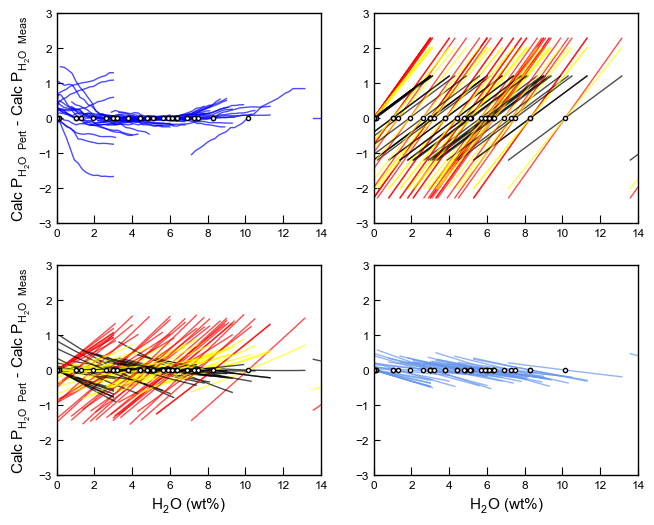

In [13]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, 
                                figsize = (7.5,6), sharey=True) # adjust dimensions 

for i in range(0, np.shape(HSens_Petrelli2020)[1]):
        #plt.plot(H_lin, H_31[:, i]-H_31[0, i], '.k', label="Iterating P and T", alpha=0.3)
    b=1
    liqs=myLiquids1['H2O_Liq'].loc[Filt]
    ax0.plot(delta_H_lin+liqs.iloc[i], HSens_Petrelli2020[:, i]
             -Exp_HSens_Petrelli2020[i],
             '-', color='blue', alpha=0.7, lw=1)

    ax1.plot(delta_H_lin+liqs.iloc[i], HSens_eq30[:, i]-Exp_HSens_eq30[i],
             '-', color='red', alpha=0.7, lw=1)
    ax1.plot(delta_H_lin+liqs.iloc[i], HSens_eq31[:, i]-Exp_HSens_eq31[i],
             '-', color='black', alpha=0.7, lw=1)
    ax1.plot(delta_H_lin+liqs.iloc[i], HSens_eq32c[:, i]-Exp_HSens_eq32c[i],
             '-', color='yellow', alpha=0.7, lw=1)
    
    ax2.plot(delta_H_lin+liqs.iloc[i], HSens_eq33_eq30[:, i]-Exp_HSens_eq33_eq30[i],
             '-', color='red', alpha=0.7, lw=1)    
    ax2.plot(delta_H_lin+liqs.iloc[i], HSens_eq33_eq31[:, i]-Exp_HSens_eq33_eq31[i],
             '-', color='black', alpha=0.7, lw=1)
    
    ax2.plot(delta_H_lin+liqs.iloc[i], HSens_eq33_eq32c[:, i]-Exp_HSens_eq33_eq32c[i],
             '-', color='yellow', alpha=0.7, lw=1)     
    ax3.plot(delta_H_lin+liqs.iloc[i], HSens_eq33_NP17[:, i]-Exp_HSens_eq33_NP17[i],
             '-', color='cornflowerblue', alpha=0.7, lw=1)        
ax0.plot(Cpx_Glass['H2O_Liq'].loc[Filt],
         Cpx_Glass['H2O_Liq'].loc[Filt]*0,
    'ok', mfc='white', ms=3)

ax1.plot(Cpx_Glass['H2O_Liq'].loc[Filt],
         Cpx_Glass['H2O_Liq'].loc[Filt]*0,
    'ok', mfc='white', ms=3) 
ax2.plot(Cpx_Glass['H2O_Liq'].loc[Filt],
         Cpx_Glass['H2O_Liq'].loc[Filt]*0,
    'ok', mfc='white', ms=3)
ax3.plot(Cpx_Glass['H2O_Liq'].loc[Filt],
         Cpx_Glass['H2O_Liq'].loc[Filt]*0,
    'ok', mfc='white', ms=3)
ax0.set_ylabel('Calc P$_{H_{2}O \,\,\,\, Pert}$ - Calc P$_{H_{2}O \,\,\,\, Meas}$')
ax2.set_ylabel('Calc P$_{H_{2}O \,\,\,\, Pert}$ - Calc P$_{H_{2}O \,\,\,\, Meas}$')


ax0.set_xlim([0, 14])
ax1.set_xlim([0, 14])
ax2.set_xlim([0, 14])
ax3.set_xlim([0, 14])


ax1.yaxis.set_tick_params(which='both', labelbottom=True)
ax3.yaxis.set_tick_params(which='both', labelbottom=True)
ax2.set_xlabel('H$_2$O (wt%)')
ax3.set_xlabel('H$_2$O (wt%)')

ax1.set_ylim([-3, 3])
fig.savefig('Cpx_Liq_Barometry_H2O_Sens.png', dpi=300)

## Working out range and average

In [14]:
MinH2OT_Petrelli2020=HSens_Petrelli2020[-1, :] # High water
MaxH2OT_Petrelli2020=HSens_Petrelli2020[0, :] # Low water
Diff_Petrelli2020=MinH2OT_Petrelli2020-MaxH2OT_Petrelli2020 # High water minus low water. 

print(-np.min(Diff_Petrelli2020)/6)
print(-np.max(Diff_Petrelli2020)/6)
print(-np.mean(Diff_Petrelli2020)/6)

0.27846142857142864
-0.31460571428571443
0.0069869001858304585


## Other statistics

In [15]:
MaxH2OT_eq33_eq30=HSens_eq33_eq30[-1, :]
MinH2OT_eq33_eq30=HSens_eq33_eq30[0, :]
Diff_eq33_eq30=MaxH2OT_eq33_eq30-MinH2OT_eq33_eq30

print(np.min(Diff_eq33_eq30)/6)
print(np.max(Diff_eq33_eq30)/6)
print(np.mean(Diff_eq33_eq30)/6)

nan
nan
nan


In [16]:
MaxH2OT_eq33_eq32c=HSens_eq33_eq32c[-1, :]
MinH2OT_eq33_eq32c=HSens_eq33_eq32c[0, :]
Diff_eq33_eq32c=MaxH2OT_eq33_eq32c-MinH2OT_eq33_eq32c

print(np.min(Diff_eq33_eq32c)/6)
print(np.max(Diff_eq33_eq32c)/6)
print(np.mean(Diff_eq33_eq32c)/6)

-0.08261769813937676
0.28172385080731105
0.1286600999371367


In [17]:
MaxH2OT_eq33_eq31=HSens_eq33_eq31[-1, :]
MinH2OT_eq33_eq31=HSens_eq33_eq31[0, :]
Diff_eq33_eq31=MaxH2OT_eq33_eq31-MinH2OT_eq33_eq31

print(np.min(Diff_eq33_eq31)/6)
print(np.max(Diff_eq33_eq31)/6)
print(np.mean(Diff_eq33_eq31)/6)

-0.3346503003999975
0.04154131454472528
-0.11558306662784272


In [18]:
MaxH2OT_eq33_NP17=HSens_eq33_NP17[-1, :]
MinH2OT_eq33_NP17=HSens_eq33_NP17[0, :]
Diff_eq33_NP17=MaxH2OT_eq33_NP17-MinH2OT_eq33_NP17

print(np.min(Diff_eq33_NP17)/6)
print(np.max(Diff_eq33_NP17)/6)
print(np.mean(Diff_eq33_NP17)/6)

-0.1838792018908825
-0.04215879364862237
-0.10534007276974917


In [19]:
MaxH2OT_eq30=HSens_eq30[-1, :]
MinH2OT_eq30=HSens_eq30[0, :]
Diff_eq30=MaxH2OT_eq30-MinH2OT_eq30

print(np.min(Diff_eq30)/6)
print(np.max(Diff_eq30)/6)
print(np.mean(Diff_eq30)/6)

nan
nan
nan


In [20]:
MaxH2OT_eq31=HSens_eq31[-1, :]
MinH2OT_eq31=HSens_eq31[0, :]
Diff_eq31=MaxH2OT_eq31-MinH2OT_eq31

print(np.min(Diff_eq31)/6)
print(np.max(Diff_eq31)/6)
print(np.mean(Diff_eq31)/6)

0.3999999999999999
0.40000000000000013
0.4000000000000001


In [21]:
MaxH2OT_eq32c=HSens_eq32c[-1, :]
MinH2OT_eq32c=HSens_eq32c[0, :]
Diff_eq32c=MaxH2OT_eq32c-MinH2OT_eq32c

print(np.min(Diff_eq32c)/6)
print(np.max(Diff_eq32c)/6)
print(np.mean(Diff_eq32c)/6)

0.6699999999999999
0.6700000000000003
0.67
